# Tống Thị Vân Anh - 11200365

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import uniform
import random

## 1. Implement k-mean algorithm by Numpy

In [ ]:
def euclidean_dist(point, data):
    """
    Return euclidean distances between a point & a dataset
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))


class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]

        for _ in range(self.n_clusters - 1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean_dist(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)[0]  # Indexed @ zero to get val, not array of val
            self.centroids += [X_train[new_centroid_idx]]

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = np.zeros((self.n_clusters, X_train.shape[1]))
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean_dist(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        inertias = []
        for x in X:
            dists = euclidean_dist(x, self.centroids)
            centroid_idx = np.argmin(dists)
            inertias.append(np.min(dists))
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs, inertias



## 2. Create at least three toy [dataset](https://scikit-learn.org/stable/datasets/sample_generators.html) then apply k-mean algorithm built in the first question? Try different number of cluster to see how the result change?

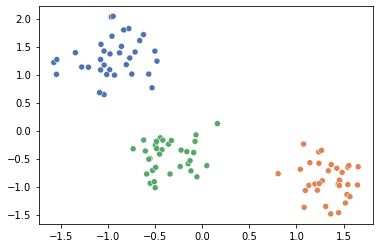

In [ ]:
# make_blobs creates groupings of 2-dimensional normal distributions,
# and assigns a label corresponding to the group said point belongs to.
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## Dataset 1: 3 groups
centers = 3
X_train1, true_labels1 = make_blobs(n_samples=100, centers=centers, random_state=9)
X_train1 = StandardScaler().fit_transform(X_train1)
sns.scatterplot(x=[X[0] for X in X_train1],
                y=[X[1] for X in X_train1],
                hue=true_labels1,
                palette="deep",
                legend=None)
plt.show()

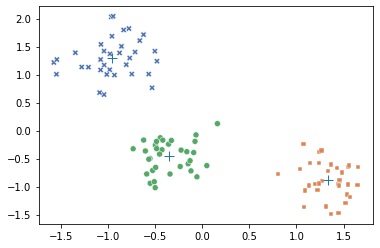

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train1)

class_centers, classification, _ = kmeans.evaluate(X_train1)
sns.scatterplot(x=[X[0] for X in X_train1],
                y=[X[1] for X in X_train1],
                hue=true_labels1,
                style=classification,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10)
plt.show()

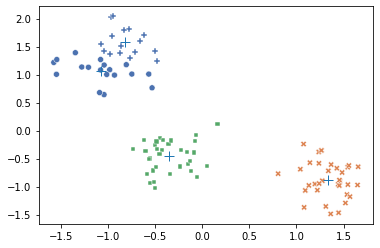

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train1)

class_centers, classification, _ = kmeans.evaluate(X_train1)
sns.scatterplot(x=[X[0] for X in X_train1],
                y=[X[1] for X in X_train1],
                hue=true_labels1,
                style=classification,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10)
plt.show()

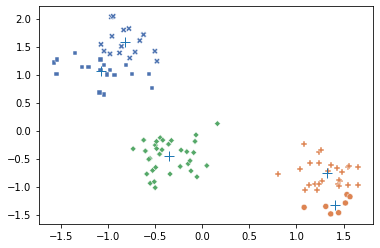

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train1)

class_centers, classification, _ = kmeans.evaluate(X_train1)
sns.scatterplot(x=[X[0] for X in X_train1],
                y=[X[1] for X in X_train1],
                hue=true_labels1,
                style=classification,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10)
plt.show()

Dataset 1 splits into 3 clusters very clearly, so with n_clusters = 3, the algorithm gives accurate results. 

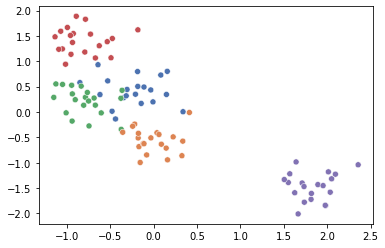

In [ ]:
## Dataset 2: 5 groups
centers = 5
X_train2, true_labels2 = make_blobs(n_samples=100, centers=centers, random_state=0)
X_train2 = StandardScaler().fit_transform(X_train2)
sns.scatterplot(x=[X[0] for X in X_train2],
                y=[X[1] for X in X_train2],
                hue=true_labels2,
                palette="deep",
                legend=None)
plt.show()

The dataset 2 consists of 5 groups, but there are 4 clusters that are quite close to each other. If divided into 2 clusters, the algorithm can split well.

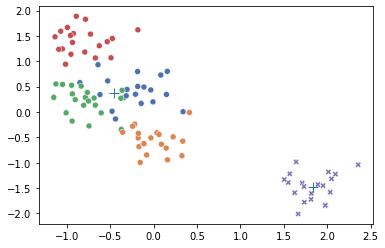

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train2)

class_centers, classification, _ = kmeans.evaluate(X_train2)
sns.scatterplot(x=[X[0] for X in X_train2],
                y=[X[1] for X in X_train2],
                hue=true_labels2,
                style=classification,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10)
plt.show()

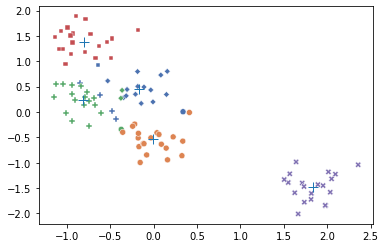

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train2)

class_centers, classification, _ = kmeans.evaluate(X_train2)
sns.scatterplot(x=[X[0] for X in X_train2],
                y=[X[1] for X in X_train2],
                hue=true_labels2,
                style=classification,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10)
plt.show()

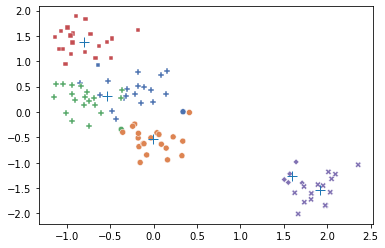

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train2)

class_centers, classification, _ = kmeans.evaluate(X_train2)
sns.scatterplot(x=[X[0] for X in X_train2],
                y=[X[1] for X in X_train2],
                hue=true_labels2,
                style=classification,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10)
plt.show()

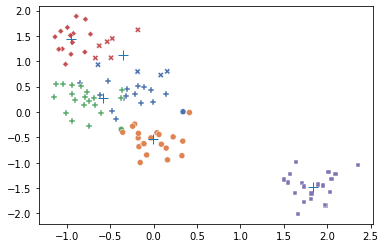

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train2)

class_centers, classification, _ = kmeans.evaluate(X_train2)
sns.scatterplot(x=[X[0] for X in X_train2],
                y=[X[1] for X in X_train2],
                hue=true_labels2,
                style=classification,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10)
plt.show()

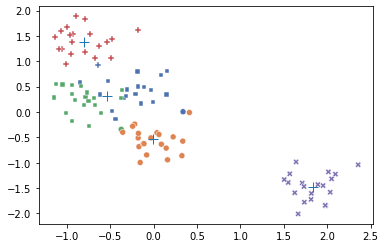

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train2)

class_centers, classification, _ = kmeans.evaluate(X_train2)
sns.scatterplot(x=[X[0] for X in X_train2],
                y=[X[1] for X in X_train2],
                hue=true_labels2,
                style=classification,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10)
plt.show()

If the number of clusters is increased by the correct number of groups of the data set, the algorithm still has certain errors when choosing inefficient initialization points.

## 3. Read and understand how to [choose k](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/), draw the elbow for the above dataset.

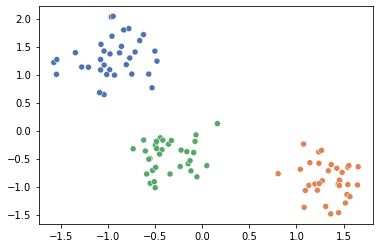

In [ ]:
sns.scatterplot(x=[X[0] for X in X_train1],
                y=[X[1] for X in X_train1],
                hue=true_labels1,
                palette="deep",
                legend=None)

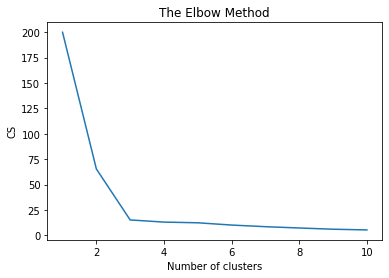

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train1)
    _, _, inertias = kmeans.evaluate(X_train1)
    inertia = np.sum(np.square(inertias))
    cs.append(inertia)

plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

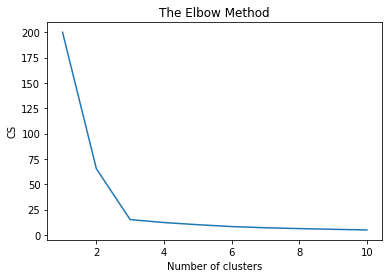

In [ ]:
# from sklearn.cluster import KMeans
# cs = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(X_train1)
#     cs.append(kmeans.inertia_)
# plt.plot(range(1, 11), cs)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('CS')
# plt.show()

## 4. Read the [limitation of k-mean](https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages), find at least 3 example k-mean doesn't work

[Ref](https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means)

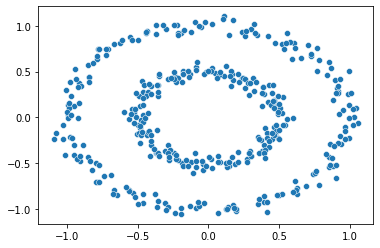

In [ ]:
## Example 1: Non-Spherical data
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=0)
sns.scatterplot(x=[x[0] for x in X],
                y=[x[1] for x in X],
                palette="deep",
                legend=None)
plt.show()

Looking at this image, we humans immediately recognize two natural groups of points- there's no mistaking them. But k-means failed.

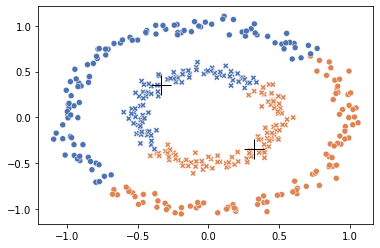

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

class_centers, classification, _ = kmeans.evaluate(X)
sns.scatterplot(x=[x[0] for x in X],
                y=[x[1] for x in X],
                hue=classification,
                style=y,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=20,
         color='black',)
plt.show()

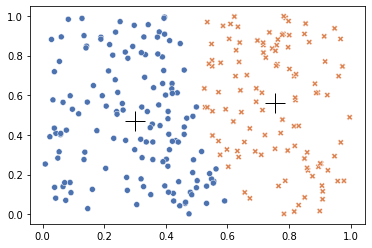

In [ ]:
## Example 2: Clustering non-clustered data
data = np.random.uniform(0, 1, size=(250, 2))

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
_, classification, _ = kmeans.evaluate(data)
sns.scatterplot(x=[x[0] for x in data],
                y=[x[1] for x in data],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=20,
         color='black',)
plt.show()

Run k-means on uniform data, and still get clusters

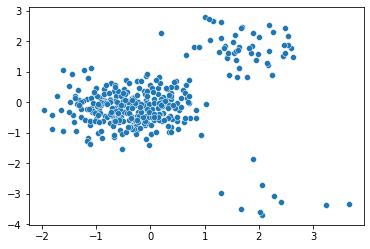

In [ ]:
## Example 3: Unevenly Sized Clusters
X, y = make_blobs(n_samples=[10, 50, 300], random_state=150)
X = StandardScaler().fit_transform(X)
sns.scatterplot(x=[x[0] for x in X],
                y=[x[1] for x in X],
                palette="deep",
                legend=None)
plt.show()

Everything seems to be generated into neat and tidy groups. But the k-means algorithm gives more "weight" to larger clusters. In practice, that means it's happy to let that small cluster end up far away from any center, while it uses those centers to "split up" a much larger cluster.

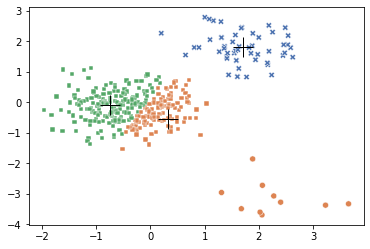

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

class_centers, classification, _ = kmeans.evaluate(X)
sns.scatterplot(x=[x[0] for x in X],
                y=[x[1] for x in X],
                hue=classification,
                style=y,
                palette="deep",
                legend=None)

plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=20,
         color='black',)
plt.show()